In [1]:
import numpy as np
import matplotlib.pyplot as plt

import aurel

# Table of Contents

 - [Quick Demonstration](#Quick-demonstration)  
     - [Conformally Flat Metric](#Conformally-Flat-Metric)  
        - [Accessing Variables](#Accessing-Variables)  
 - [In-depth Demonstration](#In-depth-Demonstration)  
        - [Documentation](#Documentation)  
        - [Grid and finite difference setup](#Grid-and-Finite-Difference-Setup)  
        - [aurel: Automatic Relativity](#aurel:-Automatic-Relativity)  
     - [Minkowski Metric](#Minkowski-Metric)  
        - [Assumed variables](#Assumed-variables)  
     - [Harvey Tsoubelis metric](#Harvey-Tsoubelis-Metric)  
        - [Weyl Scalars and Petrov Classification](#Weyl-Scalars-and-Petrov-Classification)  
        - [Cache Management](#Cache-Management)  

# Quick demonstration

In [2]:
# Define the grid parameters
L = 3
N = 72
param = { 'Nx': N, 'Ny': N, 'Nz': N, 
          'xmin': -L/2, 'ymin': -L/2, 'zmin': -L/2, 
          'dx': L/N, 'dy': L/N, 'dz': L/N}
t = 0.0

# Define the finite difference and aurel classes
fd = aurel.FiniteDifference(param)
rel = aurel.AurelCore(fd)
print(rel.data.keys())

4th order finite difference schemes are defined


<IPython.core.display.Latex object>

dict_keys([])


At this point the data dictionary is empty so there is nothing to compute from.

## Conformally flat metric

The user needs to input the spacetime and matter distribution. 
For an easy example we use a conformally flat metric:
$$
ds^2 = \Omega(x)^2 \left[- dt^2 + dx^2 + dy^2 + dz^2\right]
$$
where $\Omega(x) = 1 + x^2$.

In [3]:
from aurel.solutions import Conformally_flat as sol
rel.data = sol.data(t, fd.x, fd.y, fd.z)
"""
Om2 = ( 1 + fd.x**2 )**2
Box0 = np.zeros_like(fd.x)
rel["gammadown3"] = np.array([  Om2, zeros, zeros],
                             [zeros,   Om2, zeros],
                             [zeros, zeros,   Om2])
"""
print(rel.data.keys())
rel.freeze_data()

dict_keys(['gammadown3', 'alpha', 'Kdown3', 'Tdown4'])


### Accessing Variables

 -  alpha was part of the input data
 *****************************************************
 - Calculations for rho_n


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *****************************************************
 - Calculations for press_n


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *****************************************************
 - Calculations for s_RicciS


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *****************************************************
 - Calculations for null_ray_exp


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *****************************************************
 - Calculations for Kretschmann


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *****************************************************


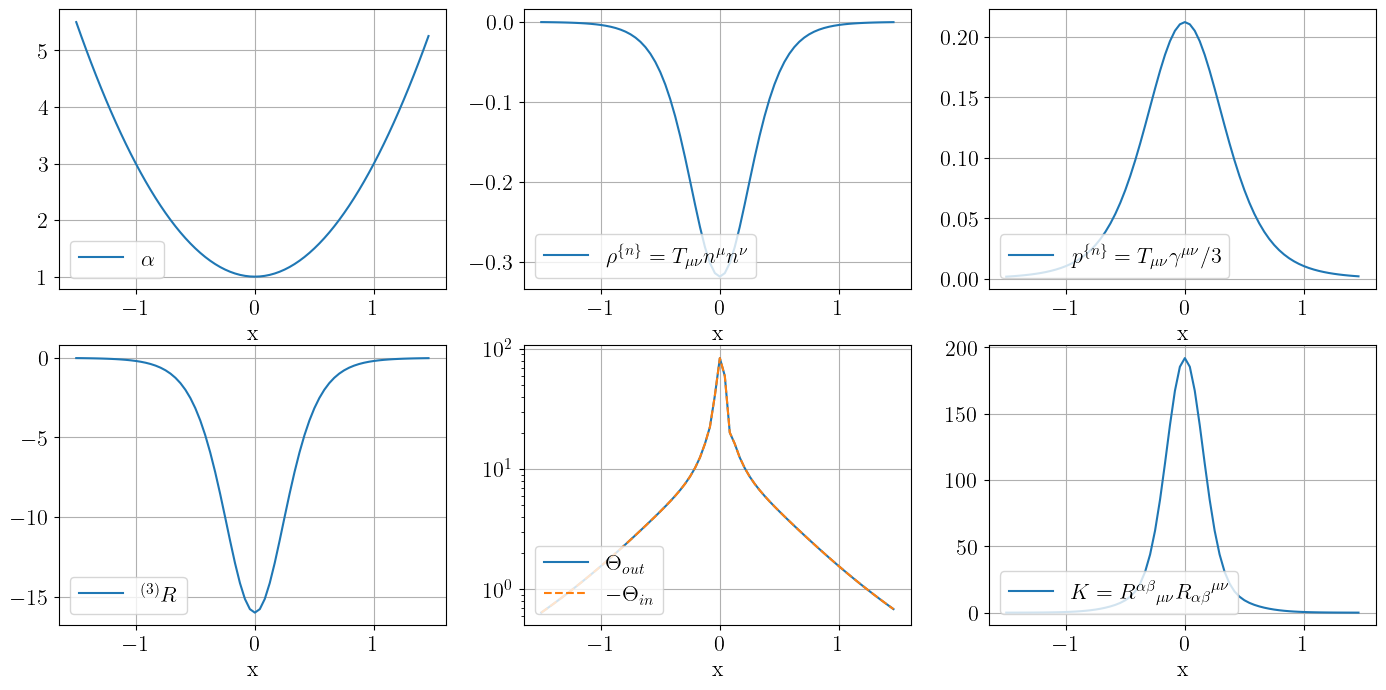

In [4]:
# Plot formating
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    'font.size': 16.0,
})
def plot_var(var, varname):
    plt.plot(fd.xarray, 
             var[:,fd.iycenter,fd.izcenter], 
             label=varname)  
    plt.xlabel('x')
    plt.grid()
    plt.legend(loc=3)
    print(" *****************************************************")
    

plt.figure(figsize=(17, 8))
plt.subplot(231)
print(" -  alpha was part of the input data")
plot_var(rel["alpha"], r'$\alpha$')

plt.subplot(232)
print(" - Calculations for rho_n")
plot_var(rel["rho_n"], 
         r'$\rho^{\{n\}} = T_{\mu\nu}n^{\mu}n^{\nu}$')

plt.subplot(233)
print(" - Calculations for press_n")
plot_var(rel["press_n"],  
         r'$p^{\{n\}} = T_{\mu\nu}\gamma^{\mu\nu} / 3$')

plt.subplot(234)
print(" - Calculations for s_RicciS")
plot_var(rel["s_RicciS"], r'${}^{(3)}R$')

plt.subplot(235)
print(" - Calculations for null_ray_exp")
plot_var(rel["null_ray_exp"][0], r'$\Theta_{out}$')
plt.semilogy(fd.xarray, 
             -rel["null_ray_exp"][1][:,fd.iycenter,fd.izcenter], 
             linestyle='--', label=r'$-\Theta_{in}$')
plt.legend(loc=3)

plt.subplot(236)
print(" - Calculations for Kretschmann")
plot_var(rel["Kretschmann"], 
         r'$K = {R^{\alpha\beta}}_{\mu\nu} {R_{\alpha\beta}}^{\mu\nu}$')


In [5]:
del param, fd, rel # for new demonstration

# In depth demonstration

## Documentation

All functions are documented, and you can access it with the help() function.

In [6]:
help(aurel.AurelCore.freeze_data)
print('---')
help(aurel.AurelCore.Ktrace)
print('---')
help(aurel.AurelCore.s_covd)

Help on function freeze_data in module aurel.core:

freeze_data(self)
    Freeze the data dictionary to prevent cache removal.

---
Help on function Ktrace in module aurel.core:

Ktrace(self)
    $K = \gamma^{ij}K_{ij}$ Trace of extrinsic curvature

---
Help on function s_covd in module aurel.core:

s_covd(self, f, indexing)
    Spatial covariant derivative of a 3D tensor of rank 0, 1 or 2.

    Covariant derivative with respects to the spatial metric.

    Parameters
    ----------
    f : (..., Nx, Ny, Nz) array_like
        Tensor of rank 0, 1 or 2. The first indices are the spatial ones.
    indexing : str
        '' for scalar,
        'u' for upper index, 'd' for down index,
        'uu' for two upper indices, 'dd' for two down indices,
        'ud' for one upper and one down index

    Returns
    -------
    (3, ..., Nx, Ny, Nz) array_like



## Grid and finite difference setup

AurelCore takes as input the FiniteDifference class that defines the grid and will be used to calculate spatial derivatives.

In [7]:
# == Parameters

L = 10 # Data grid size
N = 64 # Number of data points per side
dx = L / N # Elementary grid size
# If you are running this on your own laptop and don't want the 
# computation to take too much time, you should make N smaller. 
# (But keep in mind that the accuracy increases as N increases)

# aurel is able to work with a rectangular grid of arbitrary size 
# and number of points so each side of the grid can be different
param = {
    'Nx': N,
    'Ny': N,
    'Nz': N,
    'xmin': - L / 2,
    'ymin': - L / 2,
    'zmin': - L / 2,
    'dx': dx,
    'dy': dx,
    'dz': dx,
}

# == Finite Difference class
fd = aurel.FiniteDifference(
    param, 
    boundary = 'no boundary',
    # 'no boundary' is the default option, 
    # it calculates derivatives along edges using a combination of 
    # backward, centered and forward difference schemes
    # 'periodic' and 'symmetric' are also available
    # careful, if f is periodic, that does not mean dxf is periodic
    fd_order = 4
    # 4th order schemes are the default option,
    # but 6th and 8th order schemes are also available
    )

4th order finite difference schemes are defined


There are a couple useful variables that are defined in the initialization:
 - fd.xarray, fd.yarray, fd.zarray: These are each 1D numpy arrays of the corresponding Cartesian coordinate
 - fd.x, fd.y, fd.z: These are each 3D numpy arrays of the corresponding Cartesian coordinate
 - fd.r, fd.phi (azimuth), fd.theta (inclination): These are each 3D numpy arrays of the corresponding Spherical coordinate
 - fd.cartesian_coords, fd.spherical_coords: These are lists of the previously listed coordinates
 - fd.ixcenter, fd.iycenter, fd.izcenter: These are each ints of the index of the grid position closest to the origin of the grid (x=0, y=0, z=0).

These are useful for plotting but also for generating analytical data. Furthermore, the FiniteDifference class functions can be used independently to calculate spatial derivatives. 

FiniteDifference is defined outside of the AurelCore class, because all calculations in AurelCore are valid for a fixed time, while FiniteDifference is valid for all times.
So for multiple timesteps, the Aurel class should be redefined for each.
The timesteps can then be treated independently in parallel.

## aurel: Automatic Relativity

In [8]:
# == Aurel class
rel = aurel.AurelCore(
    fd,
    verbose = True # Default
)

<IPython.core.display.Latex object>

In [9]:
# There are two main dictionnaries in aurel:
print(list(rel.data.keys()))
print(list(aurel.descriptions.keys()))

[]
['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'gammadown3', 'gammaup3', 'dtgammaup3', 'gammadet', 'gammadown4', 'gammaup4', 'kxx', 'kxy', 'kxz', 'kyy', 'kyz', 'kzz', 'Kdown3', 'Kup3', 'Ktrace', 'Adown3', 'Aup3', 'A2', 'alpha', 'dtalpha', 'betaup3', 'dtbetaup3', 'betadown3', 'betamag', 'nup4', 'ndown4', 'gdown4', 'gup4', 'gdet', 'null_ray_exp', 'rho0', 'press', 'eps', 'rho', 'enthalpy', 'w_lorentz', 'velup3', 'uup0', 'uup3', 'uup4', 'udown3', 'udown4', 'hdown4', 'hmixed4', 'hup4', 'Tdown4', 'rho_n', 'fluxup3_n', 'fluxdown3_n', 'angmomup3_n', 'angmomdown3_n', 'Stressup3_n', 'Stressdown3_n', 'Stresstrace_n', 'press_n', 'anisotropic_press_down3_n', 'rho_n_fromHam', 'fluxup3_n_fromMom', 'conserved_D', 'conserved_E', 'conserved_Sdown4', 'conserved_Sdown3', 'conserved_Sup4', 'conserved_Sup3', 'dtconserved', 'st_covd_udown4', 'accelerationdown4', 'accelerationup4', 's_covd_udown4', 'thetadown4', 'theta', 'sheardown4', 'shear2', 'omegadown4', 'omega2', 's_RicciS_u', 's_Gamma_udd3', 's_Riemann_u

As you can see, right now the AurelCore.data dictionnary is empty, so far we have not provided the spacetime or matter fields or asked for anything to be calculated.

The au.descriptions dictionnary lists all variables that aurel knows how to handle and calculate, and gives the corresponding discriptive documentation. To compute a variable, you can either call its method directly or access it like a dictionary key.

Taking an example with Ktrace, the trace of the extrinsic curvature, this variable can be called in two ways:
 - AurelCore.Ktrace() this is calling the function that calculates that variable, then directly returns it
 - AurelCore["Ktrace"] this is calling the variable in the AurelCore.data dictionary. If it is not available, then AurelCore.Ktrace() is called to complete the calculation and its output is stored in AurelCore.data and also provided to the user. Following this, should AurelCore["Ktrace"] be called again, the variable is directly retrieved from the AurelCore.data dictionary without the need for further calculations.

During these calcutions, many intermediary variables may be necessary. Thankfully, these are all listed in the desciptions dictionary. Therefore, if these are available in the data dictionary, these are provided directly, otherwise they will also be calculated.
This creates a recursive automatic process managed by the __ getitem __ function to calculate all necessary variables until important variables that the user needs to define are reached.

For the AurelCore class to complete it's calculation, necessary data includes:
 - gxx, gxy, gxz, gyy, gyz, gzz, spatial components of metric with indices down
 - kxx, kxy, kxz, kyy, kyz, kzz, spatial components of exrinsic curvature with indices down
 - rho0, rest-mass energy density

As none of these have been input yet, the code will error

In [10]:
# print(np.mean(rel["Ktrace"]))
# >> ValueError: 'kxx' is not defined. 
# Please define AurelCore.data['kxx'] = ... in the data dictionary.

We then need to provide these missing terms.
Use the variable name as the key, and provide the variable as a numpy array with the appropriate data grid shape. 

## Minkowski metric

In [11]:
# metric
rel.data["gxx"] = np.ones_like(fd.x) 
# or np.ones((Nx, Ny, Nz)) or np.ones(rel.data_shape)
rel.data["gxy"] = np.zeros_like(fd.x)
rel.data["gxz"] = np.zeros_like(fd.x)
rel.data["gyy"] = np.ones_like(fd.x)
rel.data["gyz"] = np.zeros_like(fd.x)
rel.data["gzz"] = np.ones_like(fd.x)
# extrinsic curvature
rel.data["kxx"] = np.zeros_like(fd.x)
rel.data["kxy"] = np.zeros_like(fd.x)
rel.data["kxz"] = np.zeros_like(fd.x)
rel.data["kyy"] = np.zeros_like(fd.x)
rel.data["kyz"] = np.zeros_like(fd.x)
rel.data["kzz"] = np.zeros_like(fd.x)
# rest mass energy density
rel.data["rho0"] = np.zeros_like(fd.x)

# with the spacetime and matter variables defined, 
# we can now calculate anything in aurel.descriptions:
print(' *** Determinant of the spatial metric: ', 
      np.mean(rel["gammadet"]))
print(' *** Determinant of the spacetime metric: ', 
      np.mean(rel["gdet"]))
print(' *** Trace of the extrinsic curvature: ', 
      np.mean(rel["Ktrace"]))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *** Determinant of the spatial metric:  1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *** Determinant of the spacetime metric:  -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 *** Trace of the extrinsic curvature:  0.0


### Assumed variables

You may notice with the verbose output we are informed that aurel makes certain assumptions:
 - $\Lambda = 0$, the Cosmological constant, to change this do AurelCore.Lambda = ... before running calculations
 - $\alpha = 1$, the lapse, key: alpha, to change this do AurelCore.data["alpha"] = ... before running calculations
 - $\partial_t \alpha = 0$, the time derivative of the lapse, key: dtalpha 
 - $\beta^i = 0$, the shift vector with spatial indices up, key: betaup3
 - $\partial_t \beta^i = 0$, the time derivative of the shift vector with spatial indices up, key: dtbetaup3
 - $p = 0$, the fluid pressure, key: press
 - $\epsilon = 0$, the fluid specific internal energy, key: eps
 - $W = 1$, the Lorentz factor, key: w_lorentz
 - $v^i = 0$, the Eulerian fluid three velocity with spatial indices up, key: velup3

This is to reduce the number of variable the user has to handle.

## Harvey Tsoubelis metric

Now let us use a more interesting spacetime, a number of different analytical spacetimes can be found in the solutions folder. Here we use the Harvey Tsoubelis solution that corresponds to a vacuum plane wave solution.

Should you want to do numerical calculations from an analytical spacetime, this can be done by directly providing the corresponding numpy arrays, as was done for the Minkowski example. Or you can create a python file for your specific solution and call it to pass the generated data to AurelCore.data as was done in the Conformally flat example and in the Harvey Tsoubelis example below.

In [12]:
# We can use the same grid as before so we keep param and fd 
# but AurelCore needs to be redefined for this example
del rel
rel = aurel.AurelCore(fd) 

<IPython.core.display.Latex object>

In [13]:
from aurel.solutions import Harvey_Tsoubelis as sol
# This module generates numerical data for the 
# analytical Harvey-Tsoubelis solution
# The spacetime and matter variables are defined in the file 
# as functions that depend on the grid coordinates

# define the coordinates used
t = 2
x, y, z = fd.cartesian_coords

# Update the AurelCore.data dictionnary to include 
# the spacetime and matter solution
rel.data["gammadown3"] = sol.gammadown3(t, x, y, z) 
# this is a (3, 3, Nx, Ny, Nz) numpy.array
rel.data["Kdown3"] = sol.Kdown3(t, x, y, z)
# this is a (3, 3, Nx, Ny, Nz) numpy.array
rel.data["Tdown4"] = sol.Tdown4(t, x, y, z)
# this is a (4, 4, Nx, Ny, Nz) numpy.array
rel.data["uup4"] = sol.uup4(t, x, y, z)
# this is a (4, 4, Nx, Ny, Nz) numpy.array
rel.freeze_data() 
# freeze the data to not delete it in cache cleanup

Notice here we directly passed, gammadown3 instead of gxx, gxy, gxz, ... and Tdown4 instead of rho0.
This is because the automatic recursive process will only go down to what it needs for the specific calculation requested.

### Weyl Scalars and Petrov Classification

In [14]:
for i in range(5):
    Psi = fd.cutoffmask2(rel["Weyl_Psi"][i])
    print('mean(abs(Psi_{})) = '.format(i), 
          np.mean(np.real(Psi)), 
          ' + i(', np.mean(np.imag(Psi)), ')')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

mean(abs(Psi_0)) =  -0.056854304  + i( 0.00043375778 )
mean(abs(Psi_1)) =  0.00036388863  + i( 0.0005091321 )
mean(abs(Psi_2)) =  0.0011930849  + i( -0.00489712 )
mean(abs(Psi_3)) =  -8.006629e-05  + i( -0.0001327365 )
mean(abs(Psi_4)) =  -0.04428654  + i( 0.009394549 )


In [15]:
# Notice that here I'm applying the FiniteDifference.cutoffmask function 
# before taking the mean.
help(fd.cutoffmask2)
# The backward and forward finite difference schemes 
# slightly underperform compared to the centered one, 
# so that is why I remove those before taking the mean.

Help on method cutoffmask2 in module aurel.finitedifference:

cutoffmask2(f) method of aurel.finitedifference.FiniteDifference instance
    Remove boundary points, for when FDs were applied twice.



In [16]:
# By default, the Weyl scalars are computed with the 
# quasi-Kinnersley tetrad another tetrad is available 
# corresponding to the fluid and then x, y, and z directions
# it can be accessed by setting the tetrad_to_use attribute
del rel.data["Weyl_Psi"], rel.last_accessed["Weyl_Psi"]
rel.tetrad_to_use = 'not Kinnersley'

In [17]:
for i in range(5):
    Psi = fd.cutoffmask2(rel["Weyl_Psi"][i])
    print('mean(abs(Psi_{})) = '.format(i), 
          np.mean(np.real(Psi)), 
          ' + i(', np.mean(np.imag(Psi)), ')')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

mean(abs(Psi_0)) =  0.2499896  + i( -2.7545595e-05 )
mean(abs(Psi_1)) =  -5.0490246e-07  + i( -1.9817096e-06 )
mean(abs(Psi_2)) =  8.333375e-06  + i( -1.2509656e-05 )
mean(abs(Psi_3)) =  4.4611056e-07  + i( -1.9551424e-06 )
mean(abs(Psi_4)) =  -4.9920574e-05  + i( -7.415963e-06 )


In this case this tetrad provides the null principal directions in Newmann-Penrose's formalism. Where 
$\Psi_0 = t^{-2}$ (and we previously defined t = 2).

However, while two sets of tetrads are available in this code, frame rotations to find the null principal directions are not performed.

We can further check the Petrov classification by computing the Weyl invariants:

In [18]:
for i in ['I', 'J', 'L', 'K', 'N']:
    invar = fd.cutoffmask2(rel["Weyl_invariants"][i])
    print(i, '=', np.mean(abs(invar)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

I = 1.2614314e-05
J = 2.8787842e-10
L = 1.1518276e-09
K = 8.729282e-14
N = 3.2321907e-14


All invariants are numerical zero, their value decreasing as the scheme converges, and we have seen $\Psi_0 \neq 0$ so $C_{\alpha\beta\mu\nu} \neq 0$ (so the spacetime is not conformally flat). Therefore this spacetime is of Petrov type N. We can check this with the electric and magnetic parts of the Weyl tensor as $E^2 = B^2 = 1/(4t^4)$. With $E^2 = \frac{1}{2}E^{ij}E_{ij}$.

In [19]:
print('E^2 =', np.mean(fd.cutoffmask2(
    rel.magnitude3(rel["eweyl_n_down3"]))))
print('B^2 =', np.mean(fd.cutoffmask2(
    rel.magnitude3(rel["bweyl_n_down3"]))))

E^2 = 0.015614164
B^2 = 0.015625


### Cache management

Notice that aurel went through a cleanup cache process. 
Indeed during the many calculations, AurelCore.data can become quite large. 
So after **AurelCore.clear_cache_every_nbr_calc** (= 20 default) number of calculation, or when it exceeds **AurelCore.memory_threshold_inGB** (= 4 default), **AurelCore.cleanup_cache** removes variables based on how heavy and old they are. 

To protect certain variables, the **AurelCore.var_importance** dictionarry weights the variable's strain, so a variable that should never be removed is then AurelCore.var_importance[varname] = 0.0.

The **AurelCore.freeze()** function now takes meaning as this takes all the variables currently defined in AurelCore.data and updates their var_importance to never be considered strainious to deal with, and so they are protected to never be deleted in the cleanup_cache operation.

### Hope this helps!
### Now for an example working with simulation data, see the tov_ET notebook